In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# 붓꽃 데이터 CSV 파일 읽기
file_path = "/Users/jangsohyun/Desktop/Introduction_to_AI/iris.csv"
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head())
print(df.columns)

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


In [74]:
# 특성과 레이블 분리
X = df.iloc[:, :-1].values  # 마지막 열 제외
y = df.iloc[:, -1].values   # 마지막 열 (클래스)

# 데이터 분할 (훈련: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (SVM과 로지스틱 회귀에 유용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree Accuracy: 1.0000


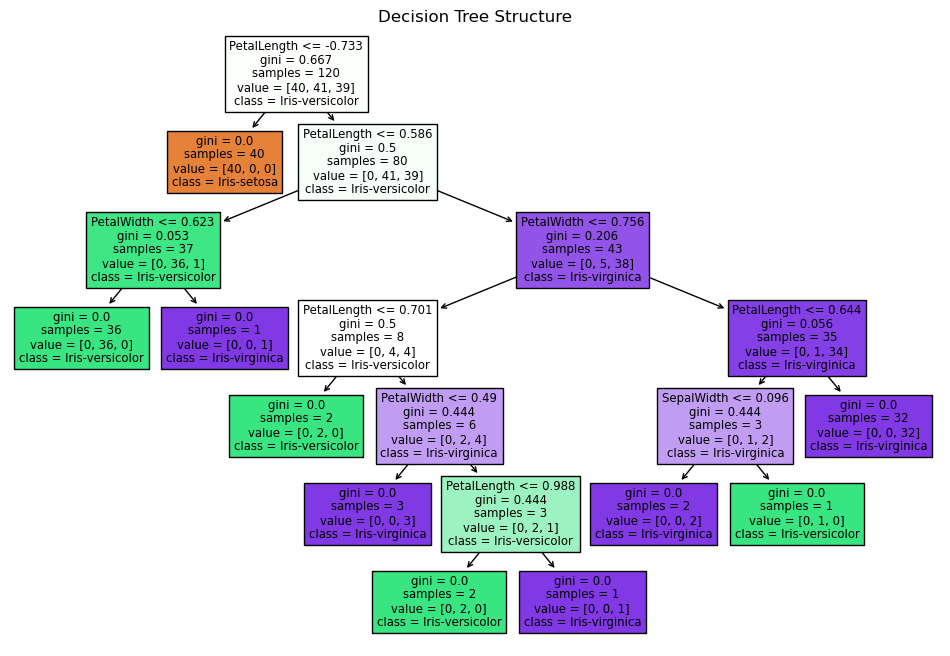

In [61]:
# 의사결정나무(DT) 학습 및 평가
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# 시각화
plt.figure(figsize=(12, 8))
plot_tree(dt_model, 
          feature_names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"], 
          class_names=list(dt_model.classes_),  # 리스트로 변환
          filled=True)
plt.title("Decision Tree Structure")
plt.show()

Random Forest Accuracy: 1.0000


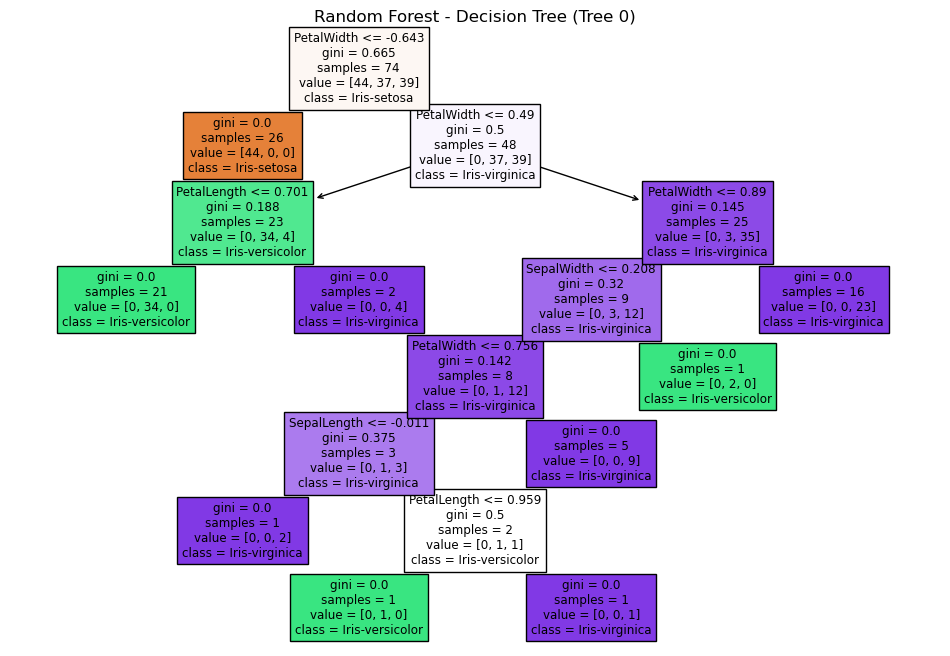

In [62]:
# 랜덤 포레스트(RF) 학습 및 평가
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 시각화(첫 번째 트리)
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], 
          feature_names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"], 
          class_names=list(rf_model.classes_), 
          filled=True)
plt.title("Random Forest - Decision Tree (Tree 0)")
plt.show()

SVM Accuracy: 1.0000


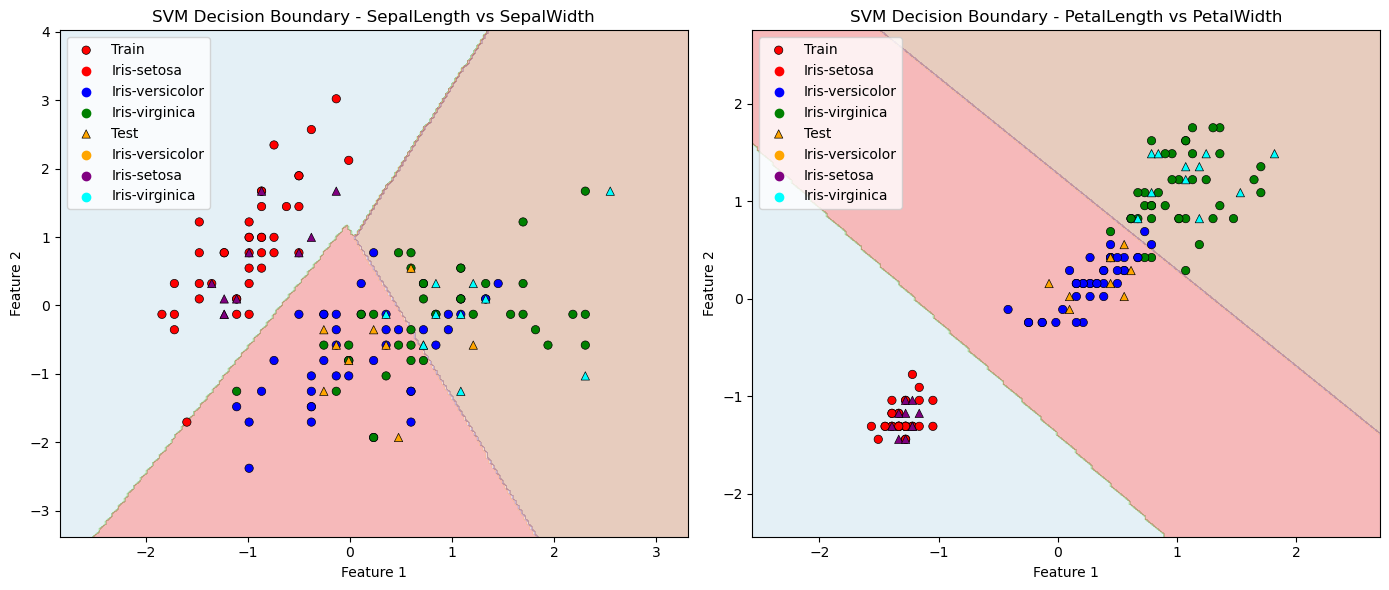

In [77]:
# 서포트 벡터 머신(SVM) 학습 및 평가
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# 클래스 라벨 숫자 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# SepalLength & SepalWidth 데이터만 사용
X_train_sw = X_train[:, :2]  # SepalLength, SepalWidth
X_test_sw = X_test[:, :2]

# PetalLength & PetalWidth 데이터만 사용
X_train_pw = X_train[:, 2:]  # PetalLength, PetalWidth
X_test_pw = X_test[:, 2:]

# 2차원 그래프 (SVM 결정 경계)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ["red", "blue", "green"]

for i, (X_train_subset, X_test_subset, ax, title) in enumerate(
        zip([X_train_sw, X_train_pw], [X_test_sw, X_test_pw], axes,
            ["SepalLength vs SepalWidth", "PetalLength vs PetalWidth"])):

    # 새로운 SVM 모델 학습 (각 데이터 세트에 맞게)
    svm_model_subset = SVC(kernel="linear")
    svm_model_subset.fit(X_train_subset, y_train_encoded)

    # 결정 경계 시각화를 위한 그리드 생성
    x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
    y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # 예측 수행 (숫자로 변환된 클래스 사용)
    Z = svm_model_subset.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 표시 (SVM 모델의 예측 값 기반)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # 훈련 데이터 시각화
    sns.scatterplot(x=X_train_subset[:, 0], y=X_train_subset[:, 1], hue=y_train, palette=colors, edgecolor="black", marker="o", ax=ax, label="Train")

    # 테스트 데이터 시각화
    sns.scatterplot(x=X_test_subset[:, 0], y=X_test_subset[:, 1], hue=y_test, palette=["orange", "purple", "cyan"], edgecolor="black", marker="^", ax=ax, label="Test")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(f"SVM Decision Boundary - {title}")

plt.tight_layout()
plt.show()

Logistic Regression Accuracy: 1.0000


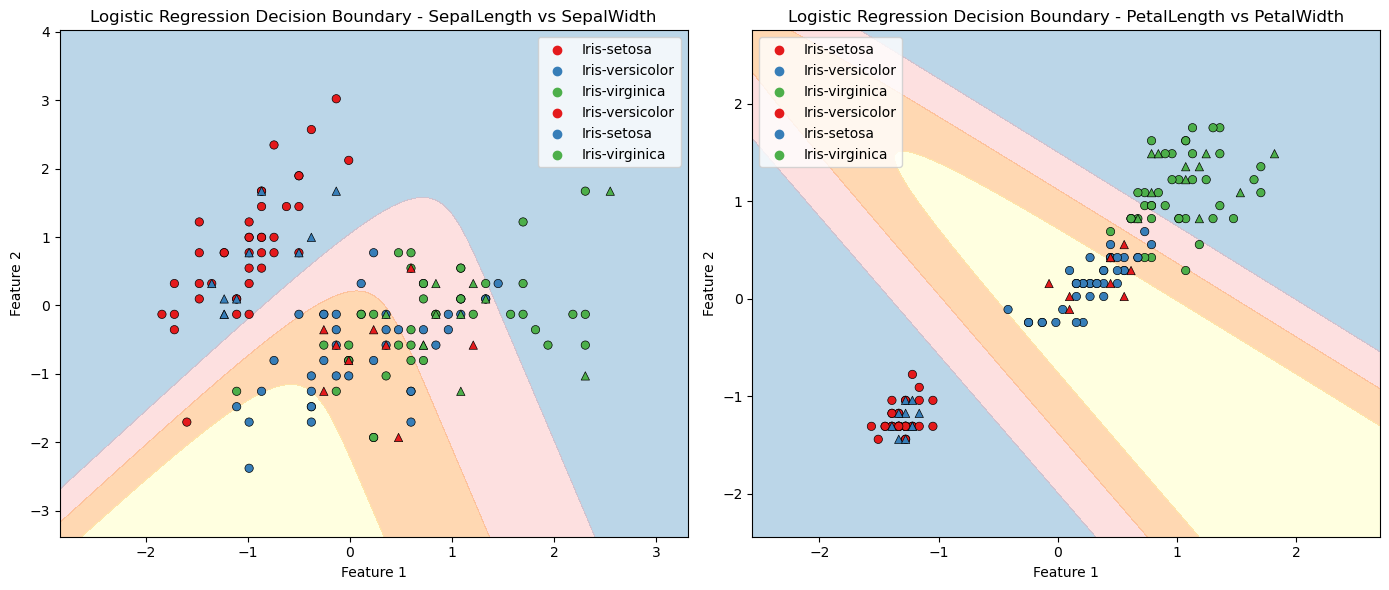

In [70]:
# 로지스틱 회귀(LR) 학습 및 평가
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# 시각화
# SepalLength & SepalWidth만 사용한 모델
lr_model_sw = LogisticRegression(max_iter=200)
lr_model_sw.fit(X_train_sw, y_train)

# PetalLength & PetalWidth만 사용한 모델
lr_model_pw = LogisticRegression(max_iter=200)
lr_model_pw.fit(X_train_pw, y_train)

# 결정 경계 시각화를 위한 격자(grid) 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, (X_train_subset, X_test_subset, lr_model_subset, ax, title) in enumerate(
        zip([X_train_sw, X_train_pw], [X_test_sw, X_test_pw], [lr_model_sw, lr_model_pw], axes,
            ["SepalLength vs SepalWidth", "PetalLength vs PetalWidth"])):

    x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
    y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # 모든 좌표에 대해 예측 수행
    Z = lr_model_subset.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # 클래스 1의 확률
    Z = Z.reshape(xx.shape)
    
    # 결정 경계 시각화
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired, levels=3)
    
    # 데이터 점 추가
    sns.scatterplot(x=X_train_subset[:, 0], y=X_train_subset[:, 1], hue=y_train, palette="Set1", edgecolor="black", marker="o", ax=ax)
    sns.scatterplot(x=X_test_subset[:, 0], y=X_test_subset[:, 1], hue=y_test, palette="Set1", edgecolor="black", marker="^", ax=ax)
    
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(f"Logistic Regression Decision Boundary - {title}")

plt.tight_layout()
plt.show()

In [13]:
# 결과 정리 및 출력
results = {
    "Model": ["Decision Tree", "Random Forest", "SVM", "Logistic Regression"],
    "Accuracy": [dt_accuracy, rf_accuracy, svm_accuracy, lr_accuracy]
}
results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy
0,Decision Tree,1.0
1,Random Forest,1.0
2,SVM,1.0
3,Logistic Regression,1.0
